In [1]:
import pandas as pd

# xmin: 114.9653, xmax: 138.694689  : diff 23.73  -> 28475
# ymin: 29.244501, ymax: 44.76545   : diff 15.52  -> 18625

# 파일 경로
file_path = './output_SRTMGL3.asc'

# 아스키 파일을 pandas 데이터프레임으로 읽기
df = pd.read_csv(file_path)
# 28809 20455
# 데이터프레임 출력
print(df[0:100])

                                   ncols        28809
0                                  nrows        20455
1                       xllcorner    113.996249999933
2                        yllcorner    29.312916666674
3                         cellsize     0.000833333333
4                                      NODATA_value 0
..                                                ...
95   1104 1107 1111 1120 1124 1126 1127 1128 1125 ...
96   1105 1107 1111 1117 1122 1122 1124 1126 1125 ...
97   1106 1108 1113 1115 1119 1123 1123 1125 1127 ...
98   1108 1109 1117 1123 1123 1124 1125 1124 1125 ...
99   1108 1112 1117 1123 1125 1127 1126 1123 1123 ...

[100 rows x 1 columns]


In [2]:
import numpy as np

lon_start = 114.9653
lon_end = 138.694689
num_lon_pixels = 28475

lat_start =29.244501
lat_end = 44.76545
num_lat_pixels = 18625

# 경도와 위도 값 생성
lons1 = np.linspace(lon_start, lon_end, num_lon_pixels)
lats1 = np.linspace(lat_start, lat_end, num_lat_pixels)

# 2차원 배열로 확장
lon_grid, lat_grid = np.meshgrid(lons1, lats1)

print(f"Longitude Grid Shape: {lon_grid.shape}")
print(f"Latitude Grid Shape: {lat_grid.shape}")

Longitude Grid Shape: (18625, 28475)
Latitude Grid Shape: (18625, 28475)


In [2]:
import numpy as np


def read_ascii_file_with_unknown_header(file_path, shape):
    """
    Read an ASCII file with an unknown number of header lines and reshape the content to the desired shape.
    
    Parameters:
    - file_path: str, path to the ASCII file
    - shape: tuple, the desired shape of the output array
    
    Returns:
    - np.ndarray, reshaped array of file contents
    """
    data = []
    header_lines = 0
    
    with open(file_path, 'r') as file:
        # Read through the file to find the header and data
        for line in file:
            try:
                # Attempt to convert the line to a float array
                float_values = np.array(line.split(), dtype=float)
                data.append(float_values)
            except ValueError:
                # If conversion fails, it is part of the header
                header_lines += 1
    
    # Convert the data list to a numpy array and reshape
    data_array = np.array(data)
    reshaped_data = data_array.reshape(shape)
    
    return reshaped_data, header_lines

# 파일 경로와 배열 형태를 정의
file_path = './output_SRTMGL3.asc'  # 실제 파일 경로로 변경
shape = (20455, 28809)  # 배열 형태
# # 28809 20455

# 파일 읽기
data_array, header_lines = read_ascii_file_with_unknown_header(file_path, shape)

# 결과 확인
print(f"Detected {header_lines} header lines.")
print(f"Data array shape: {data_array.shape}")

Detected 6 header lines.
Data array shape: (20455, 28809)


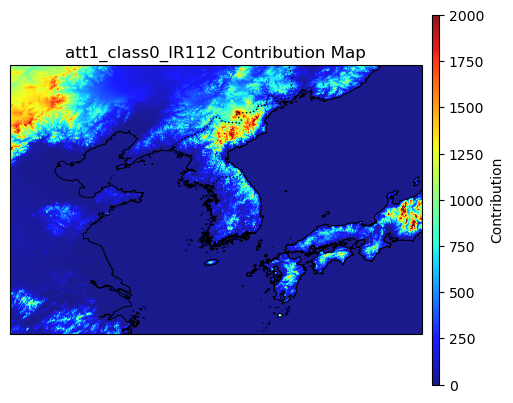

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 지도 그리기
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lon_grid.min(), lon_grid.max(), lat_grid.min(), lat_grid.max()], crs=ccrs.PlateCarree())

# 인자 기여도 배열을 지도에 오버레이
im = ax.imshow(data_array, extent=[lon_grid.min(), lon_grid.max(), lat_grid.min(), lat_grid.max()], origin='upper', cmap='jet', vmin=0, vmax=2000, transform=ccrs.PlateCarree(), alpha=0.9)

# 해양과 육지를 엣지만 표시
land = cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='black', facecolor='none', linewidth=0.5)
ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '10m', edgecolor='black', facecolor='none', linewidth=0.5)

ax.add_feature(ocean)
ax.add_feature(land)

ax.add_feature(cfeature.BORDERS, linestyle=':')



# 컬러바 추가
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.02, aspect=50)
cbar.set_label('Contribution')

plt.title('att1_class0_IR112 Contribution Map')
plt.show()

In [5]:
from skimage.transform import resize

data_array_ = resize(data_array, (900,900))

-13.91196394024944 2607.15574669645


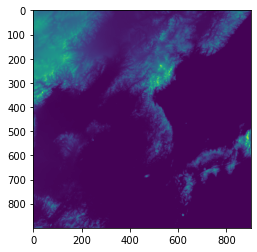

In [8]:

import matplotlib.pyplot as plt
plt.imshow(data_array_)
print(data_array_.min(), data_array_.max())

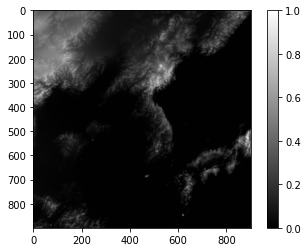

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# data_array_의 최소값과 최대값 계산
min_val = data_array_.min()
max_val = data_array_.max()

# 0에서 1로 정규화
normalized_data = (data_array_ - min_val) / (max_val - min_val)

# 정규화된 데이터 시각화
plt.imshow(normalized_data, cmap='gray')  # 컬러맵을 'gray'로 설정할 수 있습니다.
plt.colorbar()  # 컬러바 추가 (선택 사항)
plt.show()
np.save('dem_new', normalized_data)

In [32]:
dir_lonlat='/scratch/q593a07/workspace/EWP/BTD/final_model/lonlat/'
latf='lat.npy'
lonf='lon.npy'

lats = np.load(dir_lonlat+latf)
lons = np.load(dir_lonlat+lonf)

(29.35213, 46.3207, 114.05694, 137.94305)

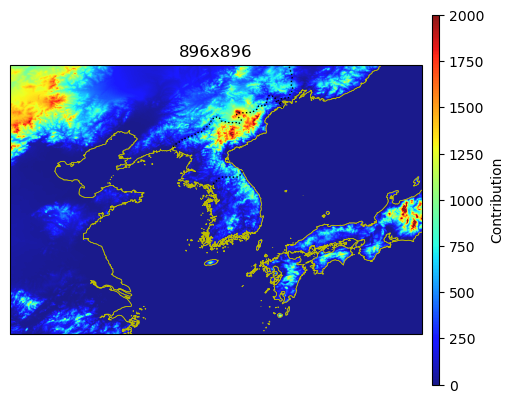

In [22]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lon_grid.min(), lon_grid.max(), lat_grid.min(), lat_grid.max()], crs=ccrs.PlateCarree())

# 인자 기여도 배열을 지도에 오버레이
im = ax.imshow(data_array_[2:-2,2:-2], extent=[lon_grid.min(), lon_grid.max(), lat_grid.min(), lat_grid.max()], origin='upper', cmap='jet', vmin=0, vmax=2000, transform=ccrs.PlateCarree(), alpha=0.9)

# 해양과 육지를 엣지만 표시
land = cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='y', facecolor='none', linewidth=0.5)
ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '10m', edgecolor='y', facecolor='none', linewidth=0.5)

ax.add_feature(ocean)
ax.add_feature(land)

ax.add_feature(cfeature.BORDERS, linestyle=':')


# 컬러바 추가
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.02, aspect=50)
cbar.set_label('Contribution')

plt.title('896x896')
plt.show()

In [23]:
np.shape(data_array_)

(900, 900)

In [25]:
dir_lonlat='/scratch/q593a07/workspace/EWP/BTD/final_model/lonlat/'
latf='lat.npy'
lonf='lon.npy'

lats = np.load(dir_lonlat+latf)[2:-2,2:-2]
lons = np.load(dir_lonlat+lonf)[2:-2,2:-2]

size = lats.size
shape = lats.shape

rows=shape[0]
cols=shape[1]

print("Size:", size)
print("Shape:", shape)

Size: 802816
Shape: (896, 896)


In [24]:
# 배열을 이진 파일로 저장
np.save('DEM_900.npy', data_array_)